#### Name: Nihal Azman
#### ID:i23b0034s14

In [3]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
fact_table = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Fact_table', engine='openpyxl')
item_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Customer_dim', engine='openpyxl')
time_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Time_dim', engine='openpyxl')
store_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Store_dim', engine='openpyxl')
print("Successfully Loaded the Dataset!")

Successfully Loaded the Dataset!


#### Practice problem 5.1

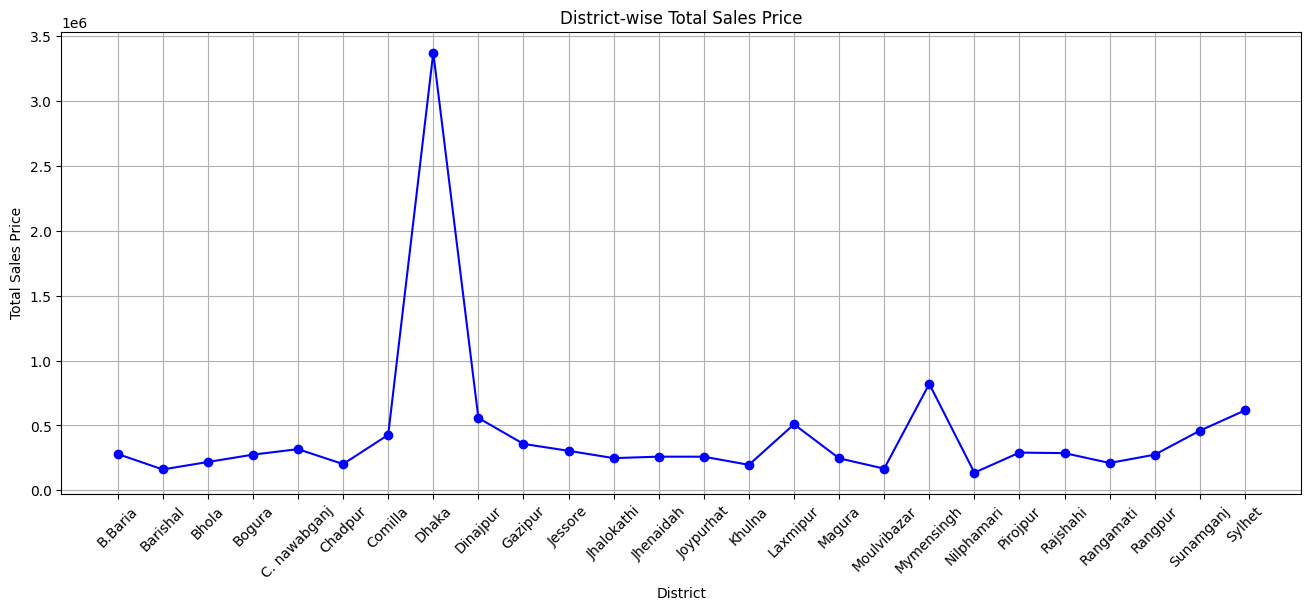

In [32]:
merged_data = pd.merge(fact_table, store_dim, on='store_key')
district_sales = merged_data.groupby('district')['total_price'].sum().reset_index()
plt.figure(figsize=(16, 6))
plt.plot(district_sales['district'], district_sales['total_price'], marker='o', linestyle='-', color='b')
plt.xlabel('District')
plt.ylabel('Total Sales Price')
plt.title('District-wise Total Sales Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Practice problem 5.2

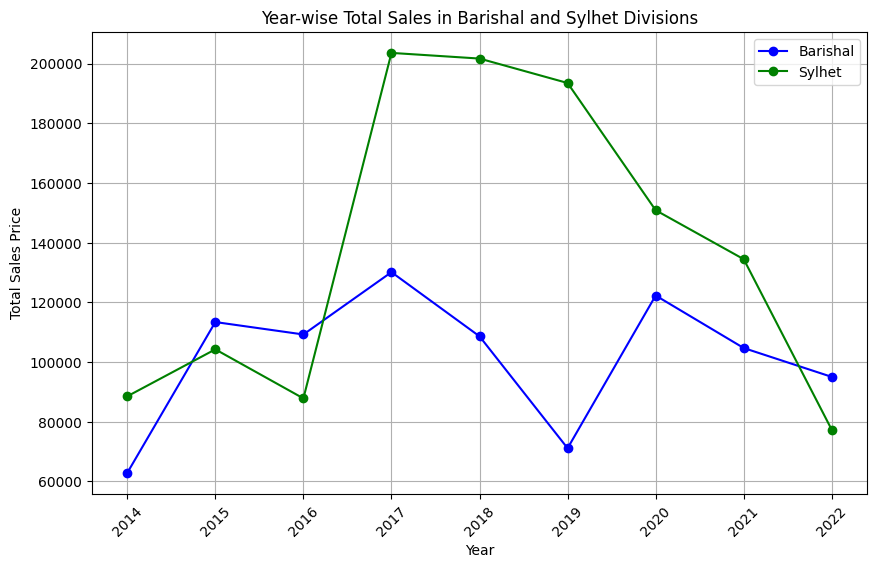

In [26]:
barishal_sylhet_data = store_dim[store_dim['division'].isin(['Barishal', 'Sylhet'])]
merged_data = pd.merge(fact_table, barishal_sylhet_data, on='store_key')
merged_data_time = pd.merge(merged_data, time_dim, on='time_key')
barishal_data = merged_data_time[merged_data_time['division'] == 'Barishal']
sylhet_data = merged_data_time[merged_data_time['division'] == 'Sylhet']

yearly_sales_barishal = barishal_data.groupby('year')['total_price'].sum().reset_index()
yearly_sales_sylhet = sylhet_data.groupby('year')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_barishal['year'], yearly_sales_barishal['total_price'], marker='o', linestyle='-', color='b', label='Barishal')
plt.plot(yearly_sales_sylhet['year'], yearly_sales_sylhet['total_price'], marker='o', linestyle='-', color='g', label='Sylhet')
plt.xlabel('Year')
plt.ylabel('Total Sales Price')
plt.title('Year-wise Total Sales in Barishal and Sylhet Divisions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


#### Practice problem 5.3

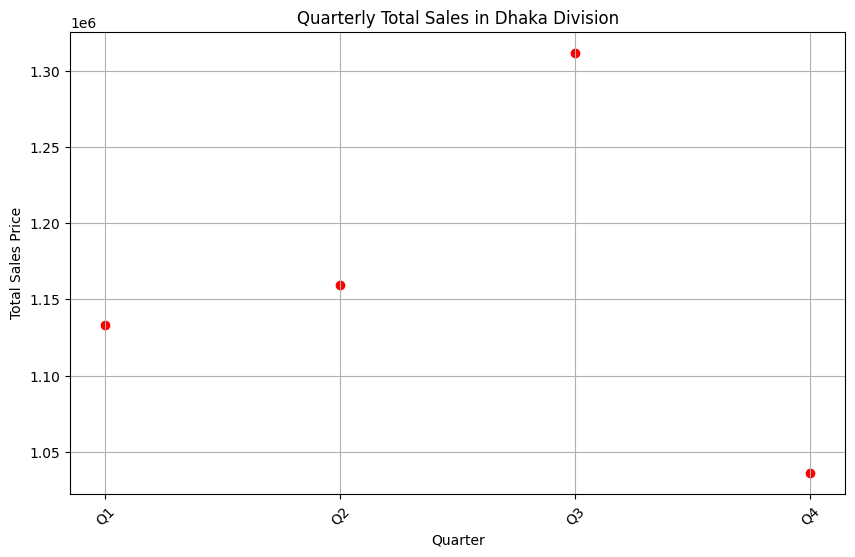

In [25]:
dhaka_data = store_dim[store_dim['division'].isin(['Dhaka'])]
merged_data = pd.merge(fact_table, dhaka_data, on='store_key')
merged_data_time = pd.merge(merged_data, time_dim, on='time_key')
dhaka_data = merged_data_time[merged_data_time['division'] == 'Dhaka']
quarterly_sales_dhaka = dhaka_data.groupby('quarter')['total_price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(quarterly_sales_dhaka['quarter'], quarterly_sales_dhaka['total_price'], marker='o', color='r')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Price')
plt.title('Quarterly Total Sales in Dhaka Division')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Practice problem 5.4

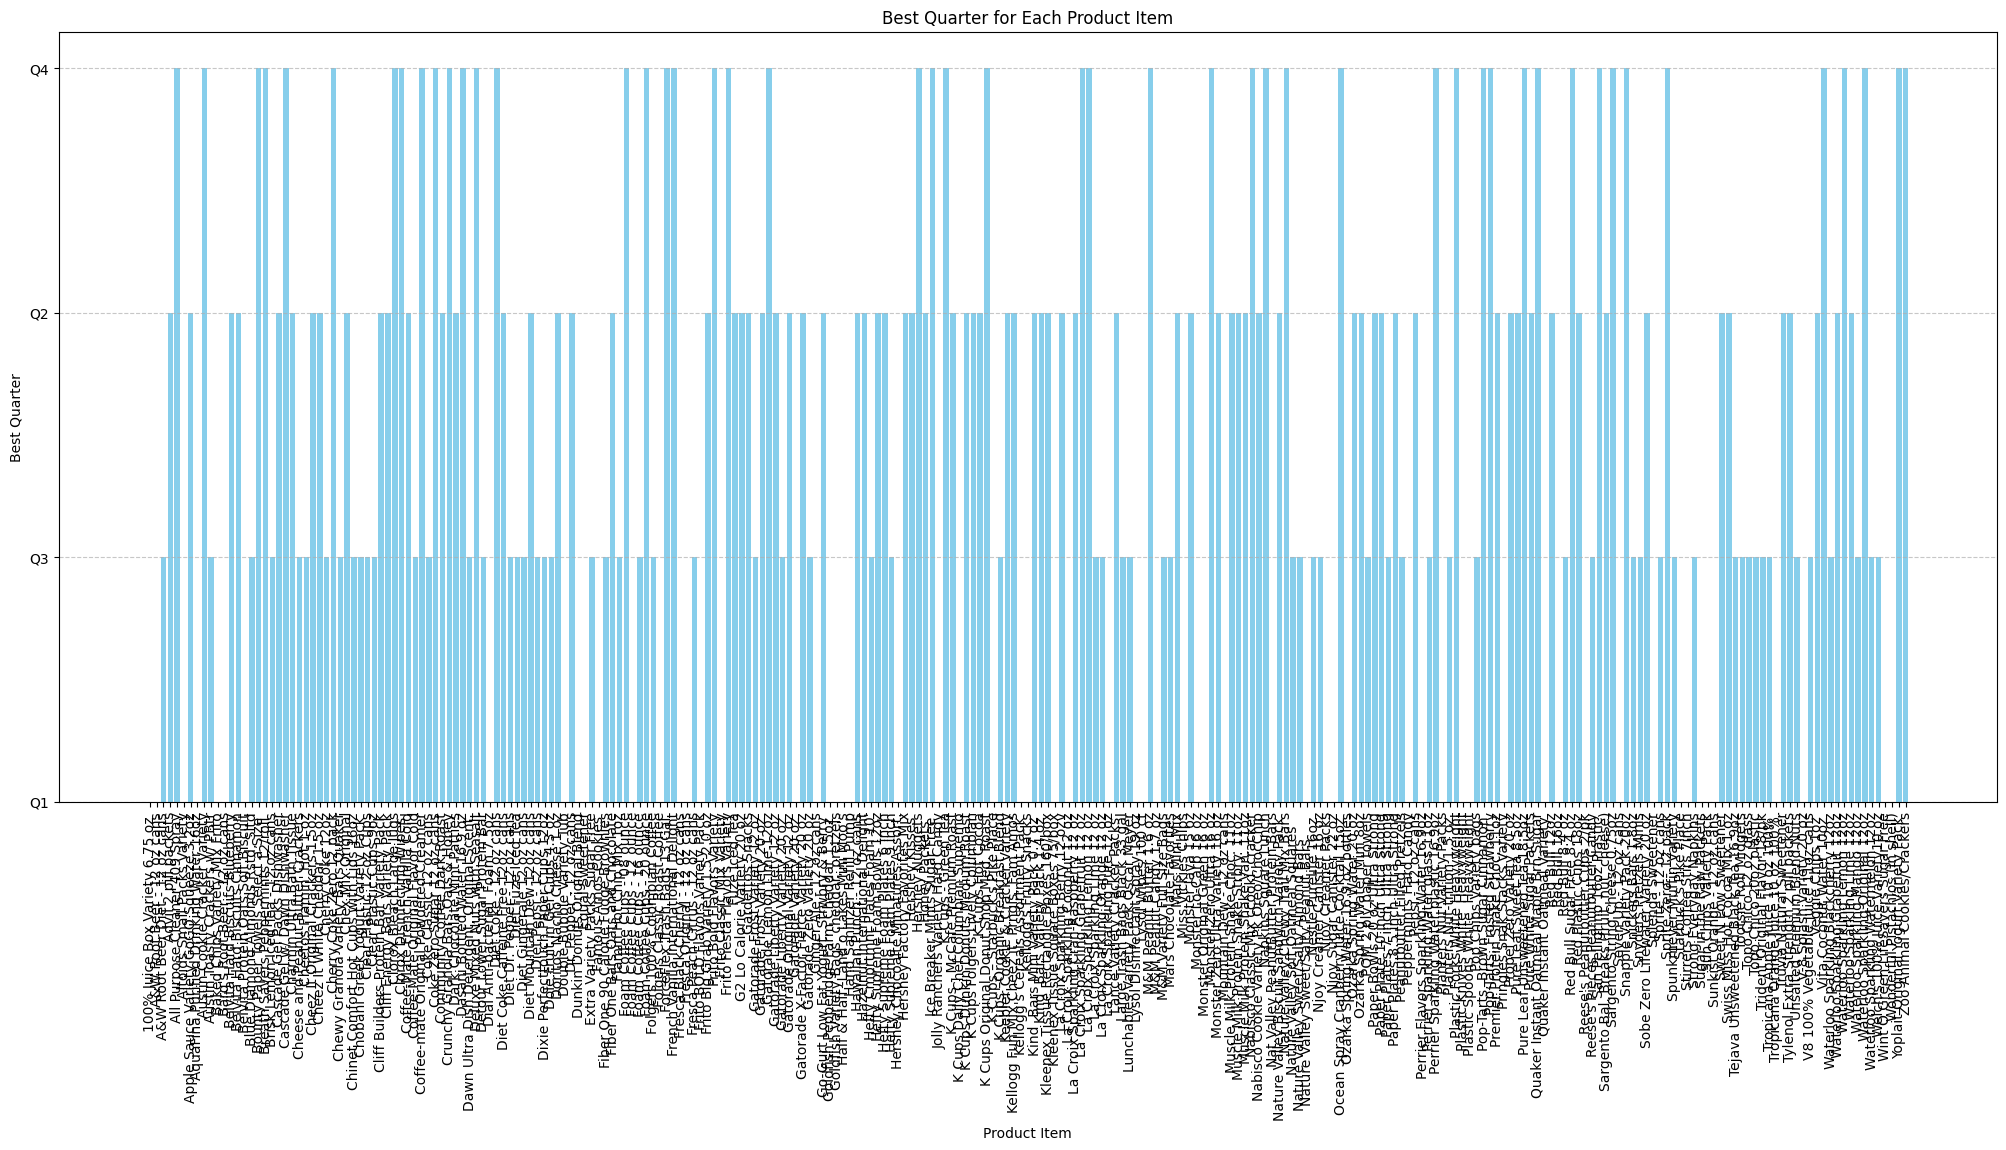

In [46]:
merged_data = pd.merge(fact_table, item_dim, on='item_key')
merged_data = pd.merge(merged_data, time_dim, on='time_key')
quarterly_sales = merged_data.groupby(['item_name', 'quarter'])['total_price'].sum().reset_index()
best_quarters = quarterly_sales.groupby('item_name')['total_price'].idxmax()
best_quarters_data = quarterly_sales.loc[best_quarters]
plt.figure(figsize=(25, 10))
plt.bar(best_quarters_data['item_name'], best_quarters_data['quarter'], color='skyblue')
plt.xlabel('Product Item')
plt.ylabel('Best Quarter')
plt.title('Best Quarter for Each Product Item')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Practice problem 5.5

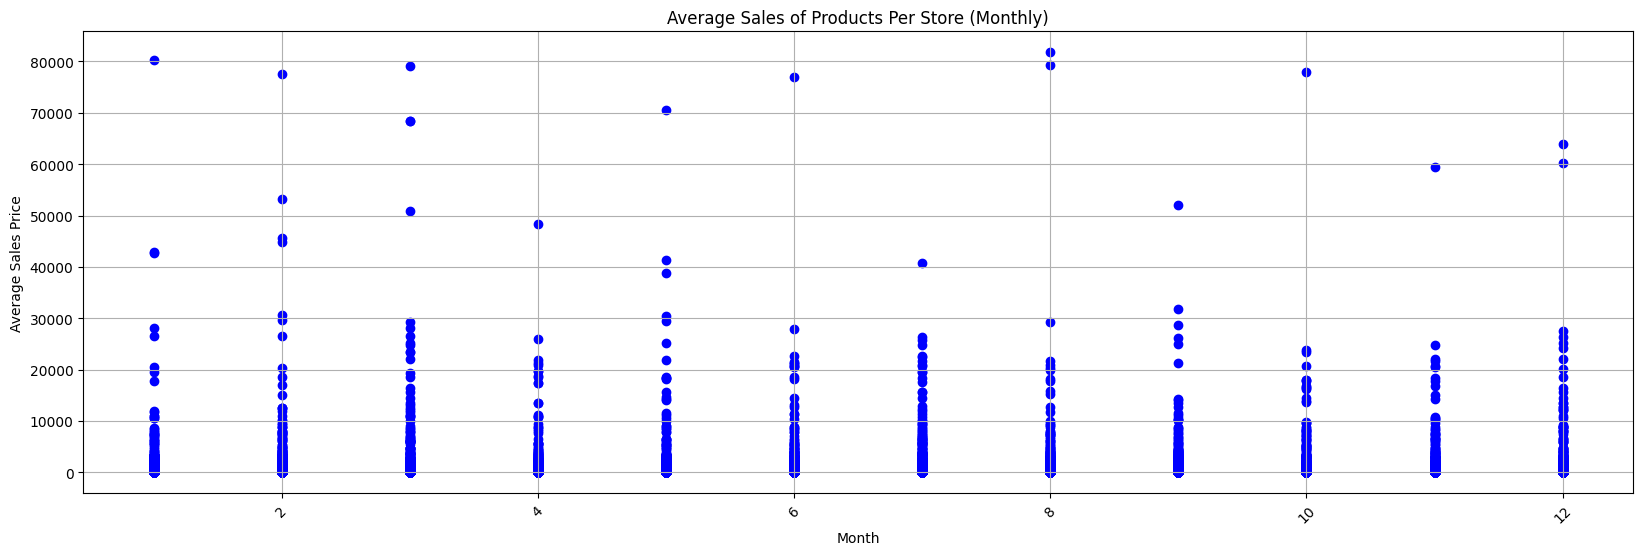

In [50]:
merged_data = pd.merge(fact_table, item_dim, on='item_key')
merged_data = pd.merge(merged_data, store_dim, on='store_key')
merged_data = pd.merge(merged_data, time_dim, on='time_key')

# Group by store, product, and month, and calculate the average sales
monthly_average_sales = merged_data.groupby(['store_key', 'item_name', 'month'])['total_price'].mean().reset_index()

# Plot the results in a scatter chart
plt.figure(figsize=(20, 6))
plt.scatter(monthly_average_sales['month'], monthly_average_sales['total_price'], marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Average Sales Price')
plt.title('Average Sales of Products Per Store (Monthly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()